### Exercise 1

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dataset = pd.DataFrame(data = iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset['species'] = dataset['target'].apply(lambda x: iris.target_names[x])

mean = dataset['sepal length (cm)'].mean()
median = dataset['sepal length (cm)'].median()
mode = dataset['sepal length (cm)'].mode()[0]

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')



Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


### Exercise 2

In [18]:
variance = dataset['petal width (cm)'].var()
standard_deviation = dataset['petal width (cm)'].std()

print(f'Variance: {variance}')
print(f'Standard Deviation: {standard_deviation}')

Variance: 0.5810062639821029
Standard Deviation: 0.7622376689603465


### Exercise 3

In [31]:
summary_table = dataset.describe().loc[['mean', '50%', 'std']]
summary_table.rename(index={'50%': 'median'}, inplace=True)

summary_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
mean,5.843333,3.057333,3.758000,1.199333,1.000000
median,5.800000,3.000000,4.350000,1.300000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232


### Exercise 4

In [36]:
sepal_count = dataset['sepal length (cm)'].value_counts(normalize=True)
sepal_distribution = pd.Series(sepal_count).sort_index()

sepal_distribution

sepal length (cm)
4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: proportion, dtype: float64

### Exercise 5

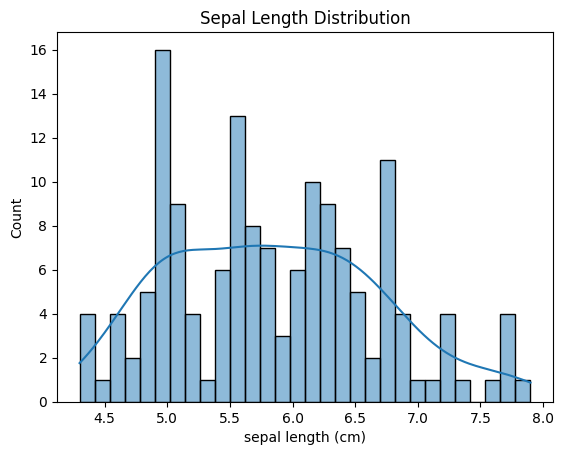

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=dataset, x='sepal length (cm)', bins=30, kde=True)
plt.title('Sepal Length Distribution')
plt.show()

### Exercise 6

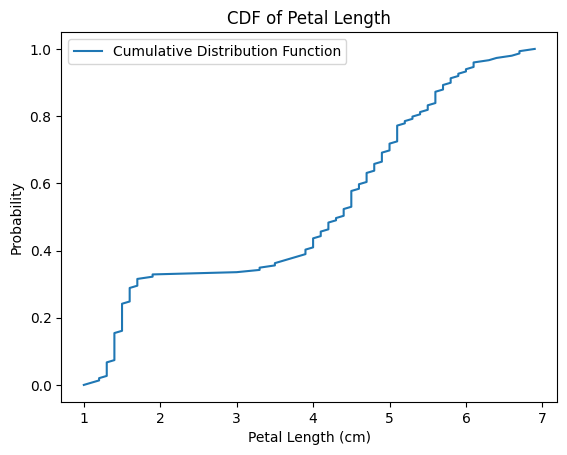

In [44]:
import numpy as np
petal_length = np.sort(dataset['petal length (cm)']) 
cdf = np.linspace(0, 1, len(petal_length))

plt.plot(petal_length, cdf, label='Cumulative Distribution Function')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.title('CDF of Petal Length')
plt.legend()
plt.show()


### Exercise 7

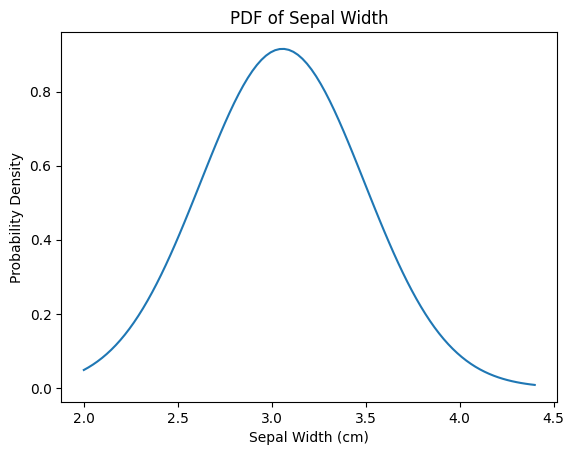

In [47]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

sepal_width_mean = dataset['sepal width (cm)'].mean()
sepal_width_std = dataset['sepal width (cm)'].std()

x = np.linspace(dataset['sepal width (cm)'].min(), dataset['sepal width (cm)'].max(), 100)
pdf_values = norm.pdf(x, sepal_width_mean, sepal_width_std)

plt.plot(x, pdf_values)
plt.title('PDF of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Probability Density')
plt.show()

### Exercise 8

In [49]:
import numpy as np
from scipy.stats import norm

given_value = 3.0

# Calculate the mean and standard deviation of the petal length
petal_length_mean = dataset['petal length (cm)'].mean()
petal_length_std = dataset['petal length (cm)'].std()

# Calculate the probability using the CDF
probability_greater_than_value = 1 - norm.cdf(given_value, petal_length_mean, petal_length_std)

print(f"Probability of Petal Length Greater Than {given_value} cm: {probability_greater_than_value}")

Probability of Petal Length Greater Than 3.0 cm: 0.6661799947700522


### Exercise 9

In [53]:
from scipy.stats import ttest_ind

# Extract the petal lengths for each species
petal_length_setosa = dataset[dataset['species'] == 'setosa']['petal length (cm)']
petal_length_virginica = dataset[dataset['species'] == 'virginica']['petal length (cm)']

# Perform the t-test
t_statistic, p_value = ttest_ind(petal_length_setosa, petal_length_virginica)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -49.98618625709594
P-value: 1.5048006992427275e-71


### Exercise 10

In [54]:
covariance = dataset['sepal length (cm)'].cov(dataset['sepal width (cm)'])
print("Covariance:", covariance)

correlation = dataset['sepal length (cm)'].corr(dataset['sepal width (cm)'])
print("Correlation:", correlation)

Covariance: -0.0424340044742729
Correlation: -0.11756978413300198
